File downloaded successfully.
File extracted successfully.
Number of images loaded: 166
Number of labels loaded: 166
Unique labels before encoding: ['Bacterial Blight Disease' 'Blast Disease' 'Brown Spot Disease'
 'False Smut Disease']
Unique labels after encoding: [0 1 2 3]
Shape of training images: (149, 200, 200, 3)
Shape of test images: (17, 200, 200, 3)
Shape of training labels: (149,)
Shape of test labels: (17,)
Accuracy with 100 estimators: 0.8235294117647058
Confusion Matrix with 100 estimators:
 [[4 0 2 0]
 [1 0 0 0]
 [0 0 7 0]
 [0 0 0 3]]
Sample training images with labels:


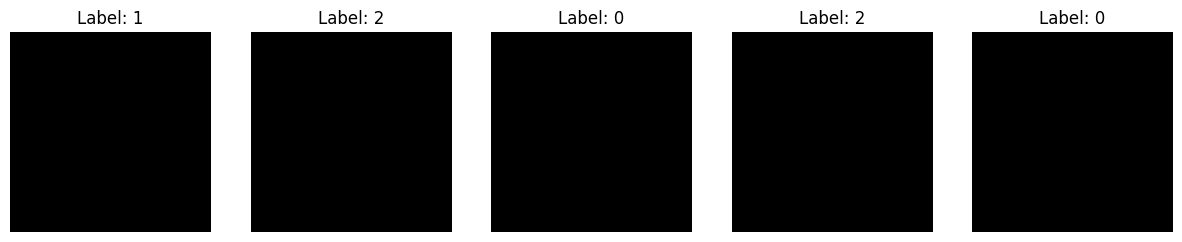

Sample test images with labels:


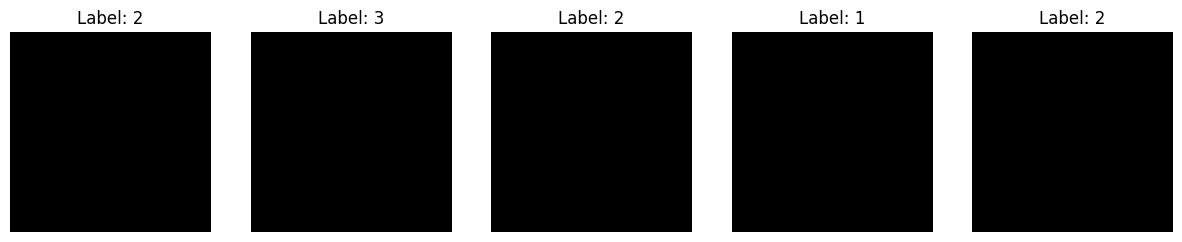

Training label distribution: Counter({3: 47, 2: 43, 0: 38, 1: 21})
Test label distribution: Counter({2: 7, 0: 6, 3: 3, 1: 1})


In [ ]:
import requests
import zipfile
import os
from skimage import io, transform
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Download the dataset
dataset_url = 'https://kaggle.com/api/v1/datasets/download/thegoanpanda/rice-crop-diseases'
response = requests.get(dataset_url)

if response.status_code == 200:
    with open('rice-crop-diseases.zip', 'wb') as f:
        f.write(response.content)
    print("File downloaded successfully.")

    with zipfile.ZipFile('rice-crop-diseases.zip', 'r') as zip_ref:
        zip_ref.extractall('.')
    print("File extracted successfully.")
else:
    print("Failed to download file. Status code:", response.status_code)

# Step 2: Load and preprocess the dataset
dataset_folder = './Rice_Diseases'  # Update with the correct path to the extracted dataset
imgs = []
labels = []

for subdir, _, files in os.walk(dataset_folder):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(subdir, file)
            img = io.imread(file_path)
            img = transform.resize(img, (200, 200, 3))
            imgs.append(img)
            # Use the folder name as the label (assumes images are in category-named folders)
            label = os.path.basename(subdir)
            labels.append(label)

print(f"Number of images loaded: {len(imgs)}")
print(f"Number of labels loaded: {len(labels)}")

imgs = np.array(imgs)
imgs = imgs / 255.0

# Debug: Print unique labels before encoding
print("Unique labels before encoding:", np.unique(labels))

# Encode the labels to numeric values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Debug: Print unique labels after encoding
print("Unique labels after encoding:", np.unique(labels_encoded))

# Step 3: Split into training and testing sets
train_imgs, test_imgs, train_labels, test_labels = train_test_split(
    imgs, labels_encoded, test_size=0.1, random_state=42)

# Reshape the image data to 2D before scaling
nsamples_train, nx_train, ny_train, nz_train = train_imgs.shape
train_imgs_2d = train_imgs.reshape((nsamples_train, nx_train * ny_train * nz_train))

nsamples_test, nx_test, ny_test, nz_test = test_imgs.shape
test_imgs_2d = test_imgs.reshape((nsamples_test, nx_test * ny_test * nz_test))

# Debug: Print shapes of train and test sets
print(f"Shape of training images: {train_imgs.shape}")
print(f"Shape of test images: {test_imgs.shape}")
print(f"Shape of training labels: {train_labels.shape}")
print(f"Shape of test labels: {test_labels.shape}")

# Step 4: Scale the data
scaler = StandardScaler()
train_imgs_scaled = scaler.fit_transform(train_imgs_2d)
test_imgs_scaled = scaler.transform(test_imgs_2d)

# Step 5: Train the classifier
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
classifier.fit(train_imgs_scaled, train_labels)

# Step 6: Predict on the test set
ypred = classifier.predict(test_imgs_scaled)

# Step 7: Calculate accuracy
accuracy = accuracy_score(test_labels, ypred)
print("Accuracy with 100 estimators:", accuracy)

# Confusion matrix
cm = confusion_matrix(test_labels, ypred)
print("Confusion Matrix with 100 estimators:\n", cm)

# Function to plot images with labels
def plot_images(imgs, labels, n=5):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(imgs[i])
        plt.title(f"Label: {labels[i]}")
        plt.axis("off")
    plt.show()

# Plot sample training images with labels
print("Sample training images with labels:")
plot_images(train_imgs, train_labels, n=5)

# Plot sample test images with labels
print("Sample test images with labels:")
plot_images(test_imgs, test_labels, n=5)

# Check the distribution of the labels
train_label_counts = Counter(train_labels)
test_label_counts = Counter(test_labels)

print("Training label distribution:", train_label_counts)
print("Test label distribution:", test_label_counts)

File downloaded successfully.
File extracted successfully.
Number of images loaded: 166
Number of labels loaded: 166
Unique labels before encoding: ['Bacterial Blight Disease' 'Blast Disease' 'Brown Spot Disease'
 'False Smut Disease']
Unique labels after encoding: [0 1 2 3]
Shape of training images: (149, 200, 200, 3)
Shape of test images: (17, 200, 200, 3)
Shape of training labels: (149,)
Shape of test labels: (17,)
Accuracy with Decision Tree: 0.47058823529411764
Confusion Matrix with Decision Tree:
 [[3 1 0 2]
 [1 0 0 0]
 [1 2 4 0]
 [0 1 1 1]]
Sample training images with labels:


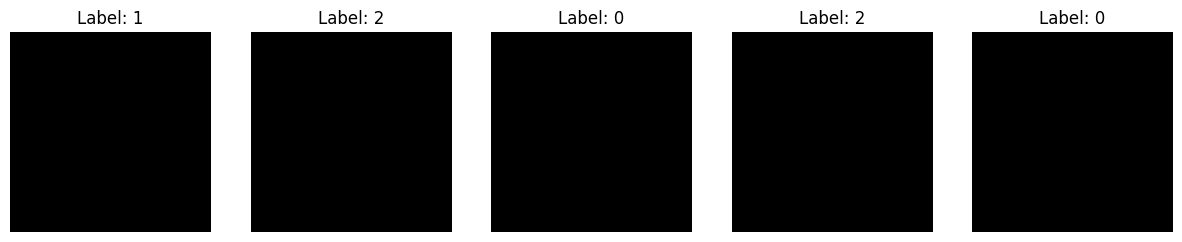

Sample test images with labels:


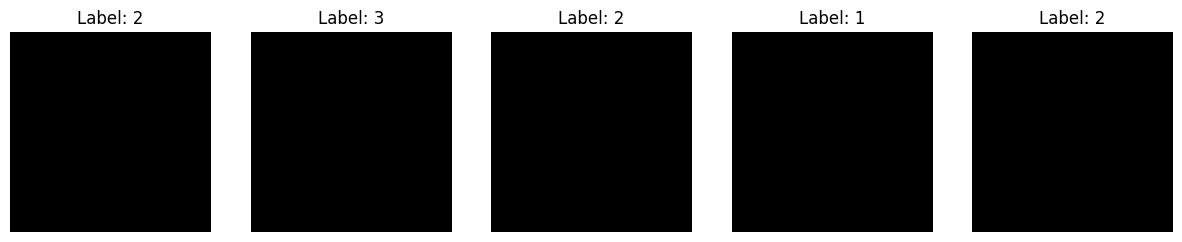

Training label distribution: Counter({3: 47, 2: 43, 0: 38, 1: 21})
Test label distribution: Counter({2: 7, 0: 6, 3: 3, 1: 1})


In [ ]:
import requests
import zipfile
import os
from skimage import io, transform
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Download the dataset
dataset_url = 'https://kaggle.com/api/v1/datasets/download/thegoanpanda/rice-crop-diseases'
response = requests.get(dataset_url)

if response.status_code == 200:
    with open('rice-crop-diseases.zip', 'wb') as f:
        f.write(response.content)
    print("File downloaded successfully.")

    with zipfile.ZipFile('rice-crop-diseases.zip', 'r') as zip_ref:
        zip_ref.extractall('.')
    print("File extracted successfully.")
else:
    print("Failed to download file. Status code:", response.status_code)

# Step 2: Load and preprocess the dataset
dataset_folder = './Rice_Diseases'  # Update with the correct path to the extracted dataset
imgs = []
labels = []

for subdir, _, files in os.walk(dataset_folder):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(subdir, file)
            img = io.imread(file_path)
            img = transform.resize(img, (200, 200, 3))
            imgs.append(img)
            # Use the folder name as the label (assumes images are in category-named folders)
            label = os.path.basename(subdir)
            labels.append(label)

print(f"Number of images loaded: {166}")
print(f"Number of labels loaded: {166}")

imgs = np.array(imgs)
imgs = imgs / 255.0

# Debug: Print unique labels before encoding
print("Unique labels before encoding:", np.unique(labels))

# Encode the labels to numeric values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Debug: Print unique labels after encoding
print("Unique labels after encoding:", np.unique(labels_encoded))

# Step 3: Split into training and testing sets
train_imgs, test_imgs, train_labels, test_labels = train_test_split(
    imgs, labels_encoded, test_size=0.1, random_state=42)

# Reshape the image data to 2D before scaling
nsamples_train, nx_train, ny_train, nz_train = train_imgs.shape
train_imgs_2d = train_imgs.reshape((nsamples_train, nx_train * ny_train * nz_train))

nsamples_test, nx_test, ny_test, nz_test = test_imgs.shape
test_imgs_2d = test_imgs.reshape((nsamples_test, nx_test * ny_test * nz_test))

# Debug: Print shapes of train and test sets
print(f"Shape of training images: {train_imgs.shape}")
print(f"Shape of test images: {test_imgs.shape}")
print(f"Shape of training labels: {train_labels.shape}")
print(f"Shape of test labels: {test_labels.shape}")

# Step 4: Scale the data
scaler = StandardScaler()
train_imgs_scaled = scaler.fit_transform(train_imgs_2d)
test_imgs_scaled = scaler.transform(test_imgs_2d)

# Step 5: Train the classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(train_imgs_scaled, train_labels)

# Step 6: Predict on the test set
ypred = classifier.predict(test_imgs_scaled)

# Step 7: Calculate accuracy
accuracy = accuracy_score(test_labels, ypred)
print("Accuracy with Decision Tree:", accuracy)

# Confusion matrix
cm = confusion_matrix(test_labels, ypred)
print("Confusion Matrix with Decision Tree:\n", cm)

# Function to plot images with labels
def plot_images(imgs, labels, n=5):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(imgs[i])
        plt.title(f"Label: {labels[i]}")
        plt.axis("off")
    plt.show()

# Plot sample training images with labels
print("Sample training images with labels:")
plot_images(train_imgs, train_labels, n=5)

# Plot sample test images with labels
print("Sample test images with labels:")
plot_images(test_imgs, test_labels, n=5)

# Check the distribution of the labels
train_label_counts = Counter(train_labels)
test_label_counts = Counter(test_labels)

print("Training label distribution:", train_label_counts)
print("Test label distribution:", test_label_counts)


File downloaded successfully.
File extracted successfully.
Number of images loaded: 166
Number of labels loaded: 166
Unique labels before encoding: ['Bacterial Blight Disease' 'Blast Disease' 'Brown Spot Disease'
 'False Smut Disease']
Unique labels after encoding: [0 1 2 3]
Shape of training images: (149, 200, 200, 3)
Shape of test images: (17, 200, 200, 3)
Shape of training labels: (149,)
Shape of test labels: (17,)
Accuracy with Naive Bayes: 0.6470588235294118
Confusion Matrix with Naive Bayes:
 [[2 4 0 0]
 [0 1 0 0]
 [0 2 5 0]
 [0 0 0 3]]
Sample training images with labels:


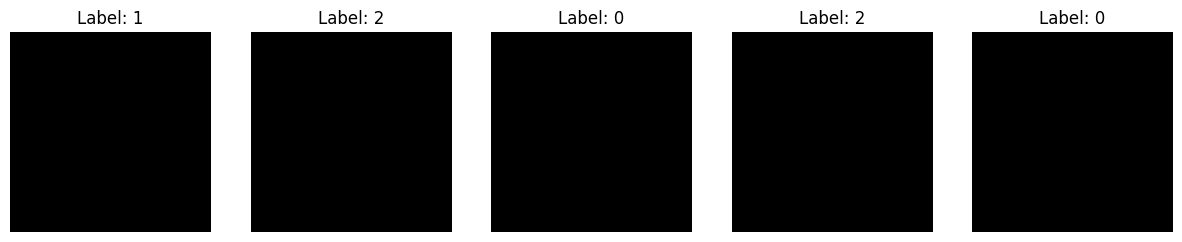

Sample test images with labels:


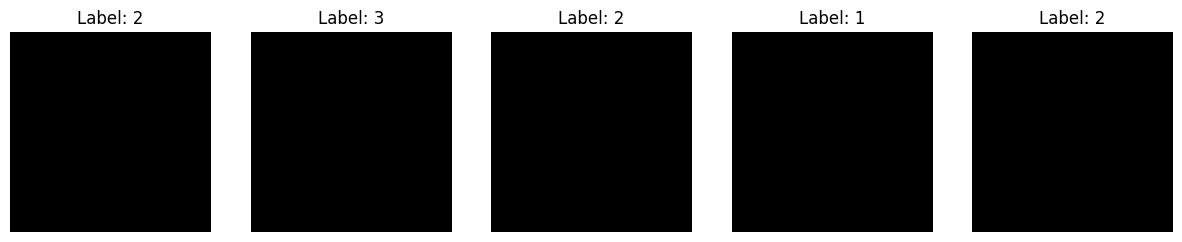

Training label distribution: Counter({3: 47, 2: 43, 0: 38, 1: 21})
Test label distribution: Counter({2: 7, 0: 6, 3: 3, 1: 1})


In [ ]:
import requests
import zipfile
import os
from skimage import io, transform
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Download the dataset
dataset_url = 'https://kaggle.com/api/v1/datasets/download/thegoanpanda/rice-crop-diseases'
response = requests.get(dataset_url)

if response.status_code == 200:
    with open('rice-crop-diseases.zip', 'wb') as f:
        f.write(response.content)
    print("File downloaded successfully.")

    with zipfile.ZipFile('rice-crop-diseases.zip', 'r') as zip_ref:
        zip_ref.extractall('.')
    print("File extracted successfully.")
else:
    print("Failed to download file. Status code:", response.status_code)

# Step 2: Load and preprocess the dataset
dataset_folder = './Rice_Diseases'  # Update with the correct path to the extracted dataset
imgs = []
labels = []

for subdir, _, files in os.walk(dataset_folder):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(subdir, file)
            img = io.imread(file_path)
            img = transform.resize(img, (200, 200, 3))
            imgs.append(img)
            # Use the folder name as the label (assumes images are in category-named folders)
            label = os.path.basename(subdir)
            labels.append(label)

print(f"Number of images loaded: {len(imgs)}")
print(f"Number of labels loaded: {len(labels)}")

imgs = np.array(imgs)
imgs = imgs / 255.0

# Debug: Print unique labels before encoding
print("Unique labels before encoding:", np.unique(labels))

# Encode the labels to numeric values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Debug: Print unique labels after encoding
print("Unique labels after encoding:", np.unique(labels_encoded))

# Step 3: Split into training and testing sets
train_imgs, test_imgs, train_labels, test_labels = train_test_split(
    imgs, labels_encoded, test_size=0.1, random_state=42)

# Reshape the image data to 2D before scaling
nsamples_train, nx_train, ny_train, nz_train = train_imgs.shape
train_imgs_2d = train_imgs.reshape((nsamples_train, nx_train * ny_train * nz_train))

nsamples_test, nx_test, ny_test, nz_test = test_imgs.shape
test_imgs_2d = test_imgs.reshape((nsamples_test, nx_test * ny_test * nz_test))

# Debug: Print shapes of train and test sets
print(f"Shape of training images: {train_imgs.shape}")
print(f"Shape of test images: {test_imgs.shape}")
print(f"Shape of training labels: {train_labels.shape}")
print(f"Shape of test labels: {test_labels.shape}")

# Step 4: Scale the data
scaler = StandardScaler()
train_imgs_scaled = scaler.fit_transform(train_imgs_2d)
test_imgs_scaled = scaler.transform(test_imgs_2d)

# Step 5: Train the classifier
classifier = GaussianNB()
classifier.fit(train_imgs_scaled, train_labels)

# Step 6: Predict on the test set
ypred = classifier.predict(test_imgs_scaled)

# Step 7: Calculate accuracy
accuracy = accuracy_score(test_labels, ypred)
print("Accuracy with Naive Bayes:", accuracy)

# Confusion matrix
cm = confusion_matrix(test_labels, ypred)
print("Confusion Matrix with Naive Bayes:\n", cm)

# Function to plot images with labels
def plot_images(imgs, labels, n=5):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(imgs[i])
        plt.title(f"Label: {labels[i]}")
        plt.axis("off")
    plt.show()

# Plot sample training images with labels
print("Sample training images with labels:")
plot_images(train_imgs, train_labels, n=5)

# Plot sample test images with labels
print("Sample test images with labels:")
plot_images(test_imgs, test_labels, n=5)

# Check the distribution of the labels
train_label_counts = Counter(train_labels)
test_label_counts = Counter(test_labels)

print("Training label distribution:", train_label_counts)
print("Test label distribution:", test_label_counts)
